## Warping of image perspective
This notebook shows the warping of a query image to fit the perspective of a base image. This is used in the gather training dataset notebook to warp all the images to the base image where the target(s) is selected. This notebook shows how it is used without the selection or saving the actual patch.

This first section imports the needed libraies and also specifies the base and query image.

You can use this notebook if you need to only extract one patch

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv

import scripts.save_patch as save_patch
import scripts.points_and_polygons as points_and_polygons

base_image_path = 'PATH_TO_IMAGE_0'
query_image_path = 'PATH_TO_IMAGE_1'

save_path = 'PATH_TO_SAVE_PATCH'
save = False # Change to true to save the extracted patch


"\nbase_image_path = 'data/bags/2024-03-21_tim/bsharp/Fixed/isaac_sci_cam_image_delayed/1711061089.228.jpg' # Example of paths\nquery_image_path = 'data/bags/2024-03-21_tim/bsharp/Fixed/isaac_sci_cam_image_delayed/1711060952.063.jpg' # Example of paths\n"

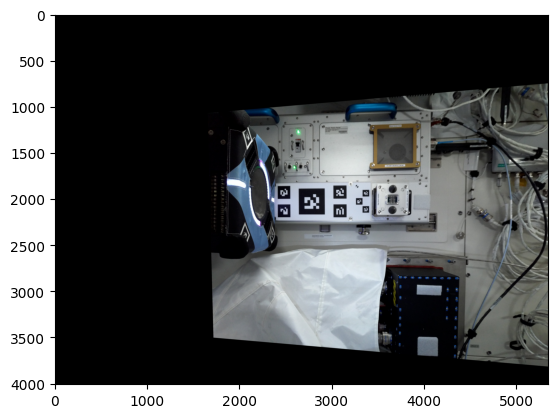

In [2]:
#transformed_image = match_images.match_images_and_crop(base_image_path, query_image_path)
transformed_image = save_patch.match_images_and_transform(base_image_path, query_image_path, None)

plt.imshow(cv.cvtColor(transformed_image, cv.COLOR_BGR2RGB))

This section sorts the corner points then extracts the target. 

You can use the target select workspace to gather some coordinates of a target you would be interested in.
Put those coordinates below and the program will extract a patch around your target.

[{'A': (2588, 1358), 'B': (2696, 1358), 'C': (2588, 1467), 'D': (2696, 1467)}]


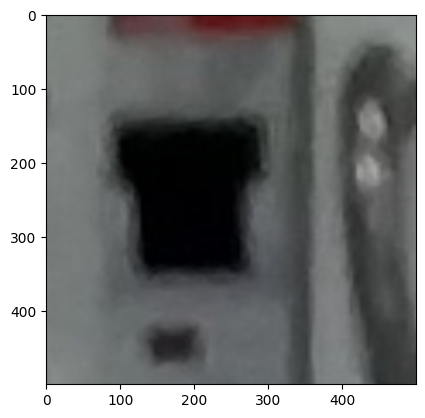

In [3]:
selected_points = [[(2588, 1358), (2696, 1358), (2588, 1467), (2696, 1467)]]
corners = points_and_polygons.identify_corners(selected_points)
print(corners)
corrected = save_patch.extract_image(transformed_image, [corners[0]['A'], corners[0]['B'], corners[0]['D'], corners[0]['C']])

plt.imshow(cv.cvtColor(corrected, cv.COLOR_BGR2RGB))

In [4]:
if save is True:
    cv.imwrite(save_path, corrected)

True